In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
def print_stats(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 score = {f1}")
    return accuracy, precision, recall, f1

In [11]:
mi_scores_series = pd.read_csv("Results_of_feature_selection\mi_scores_series.csv")

In [12]:
data = pd.read_csv("data.csv")
X = data.drop(columns=["Label", "Unnamed: 0"])
y = data["Label"]

In [13]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '385', '386', '387', '388', '389', '390', '391', '392', '393', '394'],
      dtype='object', length=359)

In [14]:
selected_features = mi_scores_series["Unnamed: 0"].head(10).astype(str).tolist()

In [15]:
selected_features

['382', '312', '212', '393', '153', '42', '387', '343', '147', '142']

['382']
Number of Features: 1
Accuracy = 0.9930004640877945
Precision = 0.9930384170179308
Recall = 0.9999615130855509
F1 score = 0.9964879406511281
[[     0   1275]
 [     7 181873]]
['382', '312']
Number of Features: 2
Accuracy = 0.9952553847833802
Precision = 0.9954888617587965
Recall = 0.9997525841213988
F1 score = 0.997616167268797
[[   451    824]
 [    45 181835]]
['382', '312', '212']
Number of Features: 3
Accuracy = 0.992743850836723
Precision = 0.9953850290562083
Recall = 0.9973169122498351
F1 score = 0.996350034192682
[[   434    841]
 [   488 181392]]
['382', '312', '212', '393']
Number of Features: 4
Accuracy = 0.992743850836723
Precision = 0.9953795922846873
Recall = 0.9973224103804706
F1 score = 0.9963500542411051
[[   433    842]
 [   487 181393]]
['382', '312', '212', '393', '153']
Number of Features: 5
Accuracy = 0.9927493106931288
Precision = 0.9953796176386663
Recall = 0.9973279085111062
F1 score = 0.9963528106427622
[[   433    842]
 [   486 181394]]
['382', '312',

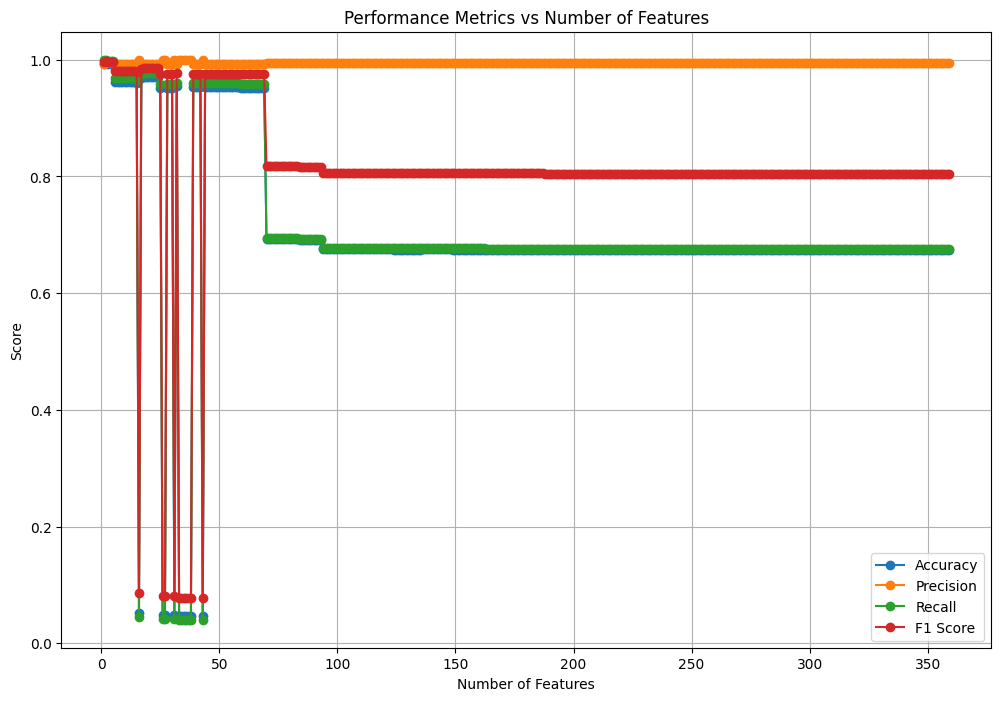

In [16]:
metrics = []
confusion_matrixs = []

for n_features in range(1, X.shape[1] + 1):

    selected_features = mi_scores_series["Unnamed: 0"].head(n_features).astype(str).tolist()
    X_selected = X[selected_features]

    print(selected_features)

    X = data.drop(columns=['Label'])  
    y_true = data['Label']  

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    preds = kmeans.predict(X_selected)
    preds = [1 if pred == 0 else 0 for pred in preds]

    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y)

    conf_matrix = confusion_matrix(y, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    metrics.append(
        {
            "n_features": n_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    )

metrics_df = pd.DataFrame(metrics)

metrics_df.to_csv(f"feature_selection_metrics_MI_kmeans.csv", index=False)

plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker='o', label="Accuracy")
plt.plot(metrics_df["n_features"], metrics_df["precision"], marker='o', label="Precision")
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker='o', label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker='o', label="F1 Score")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Performance Metrics vs Number of Features")
plt.legend()
plt.grid(True)
plt.savefig(f"metrics_vs_features_kmeans.png")
plt.show()

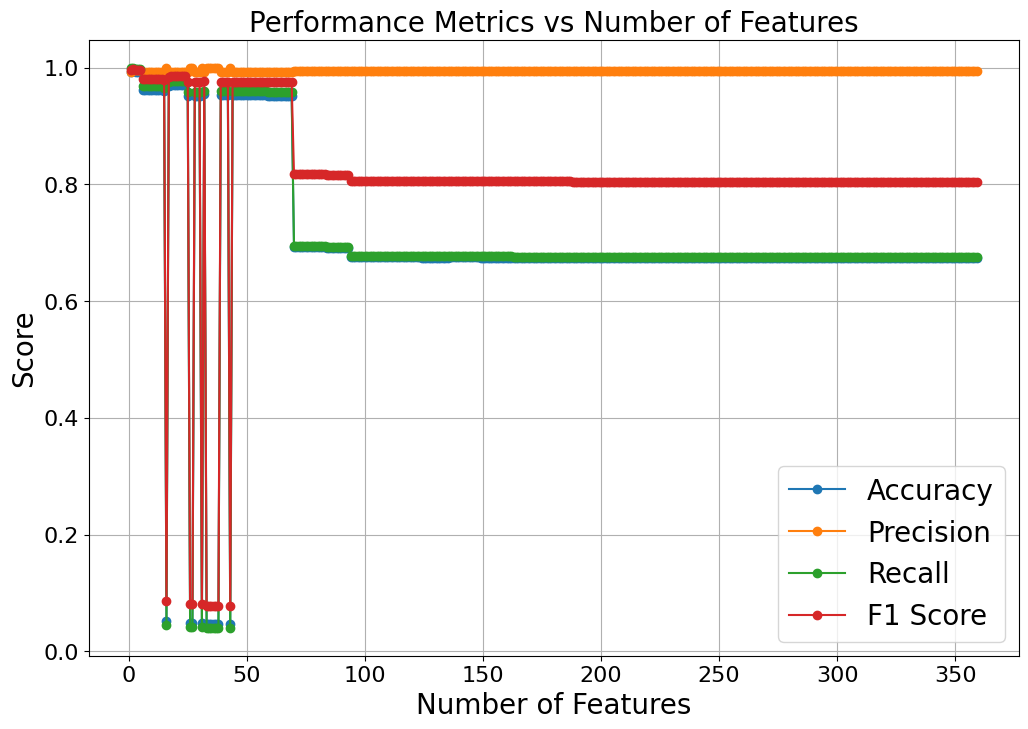

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")
plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)
plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")
plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")
plt.xlabel("Number of Features", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.title("Performance Metrics vs Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
metrics = []
confusion_matrixs = []

for n_features in range(1, X.shape[1] + 1):
    selected_features = mi_scores_series.head(n_features).index
    X_selected = X[selected_features]

    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
    kmeans.fit(X_train)

    label_counts = np.bincount(preds)

    if len(label_counts) > 1:
        if label_counts[0] > label_counts[1]:
            larger_label = 0
            smaller_label = 1
        else:
            larger_label = 1
            smaller_label = 0
        preds = np.where(preds == larger_label, 1, 0)
    else:
        preds = (
        np.zeros_like(preds) if label_counts[0] == len(preds) else np.ones_like(preds)
    )
        preds = np.where(preds == larger_label, 1, 0)
    print(f"Number of Features: {n_features}")
    accuracy, precision, recall, f1 = print_stats(preds, y_test)
    conf_matrix = confusion_matrix(y_test, preds)
    confusion_matrixs.append({"n_feature": n_features, "conf": conf_matrix})
    print(conf_matrix)

    metrics.append(
        {
            "n_features": n_features,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    )

metrics_df = pd.DataFrame(metrics)

metrics_df.to_csv(f"feature_selection_metrics_kmeans.csv", index=False)


plt.figure(figsize=(12, 8))

plt.plot(metrics_df["n_features"], metrics_df["accuracy"], marker="o", label="Accuracy")

plt.plot(
    metrics_df["n_features"], metrics_df["precision"], marker="o", label="Precision"
)

plt.plot(metrics_df["n_features"], metrics_df["recall"], marker="o", label="Recall")

plt.plot(metrics_df["n_features"], metrics_df["f1_score"], marker="o", label="F1 Score")

plt.xlabel("Number of Features")

plt.ylabel("Score")

plt.title("Performance Metrics vs Number of Features")

plt.legend()

plt.grid(True)

plt.savefig(f"metrics_vs_features_kmeans.png")

plt.show()

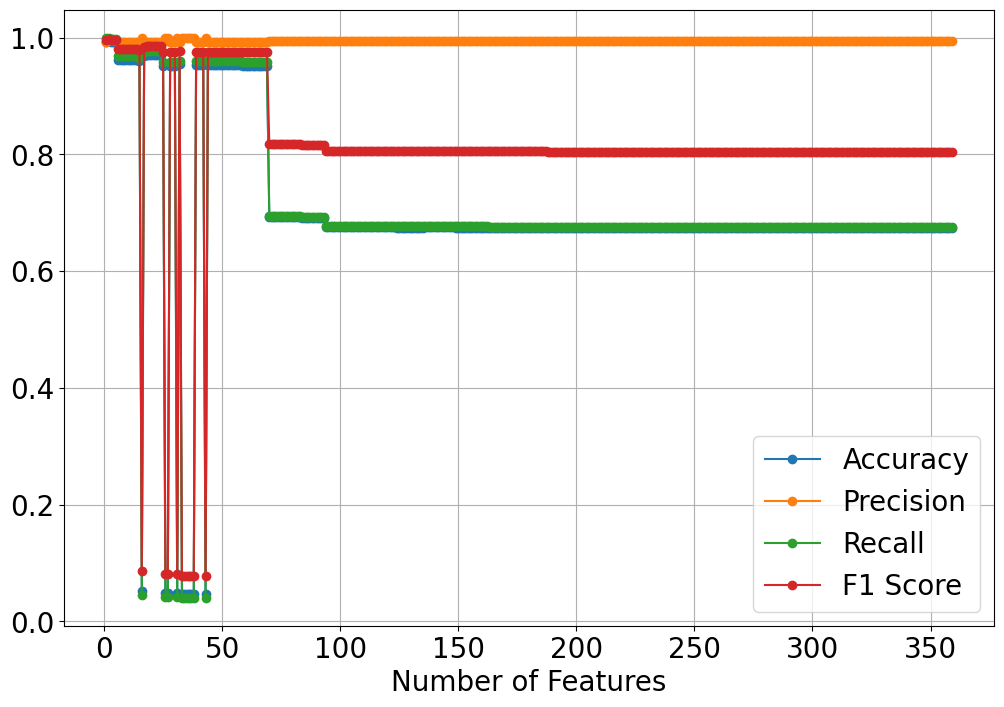

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert metrics to DataFrame and save to CSV
metrics_df = pd.read_csv("feature_selection_metrics_MI_kmeans.csv")

# Filter metrics for n_features from 1 to 50
filtered_metrics_df = metrics_df[metrics_df["n_features"].between(1, 359)]

# lot metrics for the filtered range
plt.figure(figsize=(12, 8))
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["accuracy"],
    marker="o",
    label="Accuracy",
)
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["precision"],
    marker="o",
    label="Precision",
)
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["recall"],
    marker="o",
    label="Recall",
)
plt.plot(
    filtered_metrics_df["n_features"],
    filtered_metrics_df["f1_score"],
    marker="o",
    label="F1 Score",
)
plt.xlabel("Number of Features", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
plt.show()